# 3.6 Lab: Linear Regression

## 3.6.1 Libraries

In [1]:
%matplotlib inline

import numpy as np
import scipy as sc
import pandas as pd
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

sns.set()

## 3.6.2 Simple Linear Regression

In [2]:
Boston = pd.read_csv("../data/Boston.csv")

In [3]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
Boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
def print_coef(regression_model, names=None):
    print("Intercept: {:.3f}".format(regression_model.intercept_))
    it = enumerate(regression_model.coef_, 1) if names is None else zip(names, regression_model.coef_)
    coef_id_formatter = "[{}]" if names is None else "[\"{}\"]"
    
    for coef_id, coef in it:
        print(("Coefficient " + coef_id_formatter + ": {:.4f}").format(coef_id, coef))

In [7]:
model = LinearRegression(fit_intercept=True)

X = Boston.drop("medv", axis=1)
y = Boston.loc[:, "medv"]

lstat = X.loc[:, ["lstat"]]

model.fit(lstat, y)

print_coef(model, lstat.columns)

Intercept: 34.554
Coefficient ["lstat"]: -0.9500


In [8]:
x_fit = np.array([5, 10, 15])

model.predict(x_fit[:, np.newaxis])

array([ 29.80359411,  25.05334734,  20.30310057])

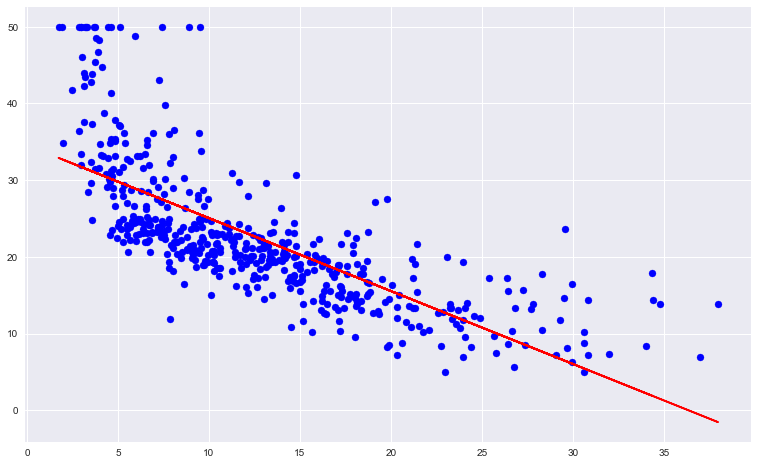

In [9]:
y_fit = model.predict(lstat)

fig, ax = plt.subplots(figsize=(13, 8))
plt.scatter(lstat, y, color='blue')
plt.plot(lstat, y_fit, color='red');

## 3.6.2 Multiple Linear Regression

In [10]:
lstat_age = X.loc[:, ["lstat", "age"]]
model.fit(lstat_age, y)

print_coef(model, lstat_age.columns)

Intercept: 33.223
Coefficient ["lstat"]: -1.0321
Coefficient ["age"]: 0.0345


In [11]:
model.fit(X, y)

print_coef(model, X.columns)

Intercept: 36.459
Coefficient ["crim"]: -0.1080
Coefficient ["zn"]: 0.0464
Coefficient ["indus"]: 0.0206
Coefficient ["chas"]: 2.6867
Coefficient ["nox"]: -17.7666
Coefficient ["rm"]: 3.8099
Coefficient ["age"]: 0.0007
Coefficient ["dis"]: -1.4756
Coefficient ["rad"]: 0.3060
Coefficient ["tax"]: -0.0123
Coefficient ["ptratio"]: -0.9527
Coefficient ["black"]: 0.0093
Coefficient ["lstat"]: -0.5248


In [12]:
model.fit(X.drop("age", axis=1), y)

print_coef(model, X.drop("age", axis=1).columns)

Intercept: 36.437
Coefficient ["crim"]: -0.1080
Coefficient ["zn"]: 0.0463
Coefficient ["indus"]: 0.0206
Coefficient ["chas"]: 2.6890
Coefficient ["nox"]: -17.7135
Coefficient ["rm"]: 3.8144
Coefficient ["dis"]: -1.4786
Coefficient ["rad"]: 0.3058
Coefficient ["tax"]: -0.0123
Coefficient ["ptratio"]: -0.9522
Coefficient ["black"]: 0.0093
Coefficient ["lstat"]: -0.5239


## 3.6.3 Interaction Terms

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(2, interaction_only=True)

lstat_age_interaction = poly.fit_transform(lstat_age)

lstat_age_interaction

array([[   1.   ,    4.98 ,   65.2  ,  324.696],
       [   1.   ,    9.14 ,   78.9  ,  721.146],
       [   1.   ,    4.03 ,   61.1  ,  246.233],
       ..., 
       [   1.   ,    5.64 ,   91.   ,  513.24 ],
       [   1.   ,    6.48 ,   89.3  ,  578.664],
       [   1.   ,    7.88 ,   80.8  ,  636.704]])

In [15]:
model.fit(lstat_age_interaction, y)

print_coef(model)

Intercept: 36.089
Coefficient [1]: 0.0000
Coefficient [2]: -1.3921
Coefficient [3]: -0.0007
Coefficient [4]: 0.0042
